# Exercise 5 - Part 2: Final Challenge - VQE for LiH molecule 
Solution by Alain Chancé, QUANTALAIN S.A.S.U., Signed in as: Alain Chance, alain.chance@gmail.com 

# Method
The 1st best score of 3 was achieved after 4 iterations.

In all iterations the following options and parameters were selected:
<ul>
<li>The initial state is the Hartree-Fock state</li>
<li>Initial_point = [0.01] * ansatz.num_parameters</li>
<li>Accuracy_threshold = 4.0 in mHa</li>
<li>ParityMapper with two_qubit_reduction=True to eliminate 2 qubits</li>
<li>Ansatz: 'TwoLocal' with the following parameters:</li>
    <ul>
    <li>Entanglement blocks: 'cx'</li>
    <li>Skip the final rotation blocks layer: False</li>
    <li>Optimizer: SLSQP</li>
    </ul>
</ul>

## Iteration 4

### Parameters
<ul>
<li>Mapper: ParityMapper</li> 
<li>Freeze core: True</li> 
<li>Z2Symmetries: [1, 1]</li> 
<li>Removing orbitals: [4, 3]</li> 
<li>Optimizer: SLSQP</li>
<li>Two qubit reduction: True</li>
<li>Ansatz: TwoLocal with the following parameters:</li>
    <ul>
    <li>Rotations blocks: ['ry', 'rz']</li> 
    <li>entanglement blocks: cx</li> 
    <li>entanglement: linear</li>
    <li>Skip the final rotation blocks layer: False</li> 
    <li>Repetitions: 1</li>
    </ul>
</ul>

### Results
<ul>
<li>Number of parameters in the ansatz (ansatz.num_parameters): 16</li>
<li>Chemical accuracy (mHa): 2.358814</li>
<li>Pass: True</li>
<li>Score: 3</li>

In [1]:
from qiskit_nature.drivers import PySCFDriver
from qiskit_nature.problems.second_quantization.electronic import ElectronicStructureProblem
from qiskit_nature.transformers import FreezeCoreTransformer
from qiskit_nature.mappers.second_quantization import ParityMapper, BravyiKitaevMapper, JordanWignerMapper
from qiskit_nature.converters.second_quantization.qubit_converter import QubitConverter
from qiskit_nature.circuit.library import HartreeFock
from qiskit.circuit.library import TwoLocal
from qiskit_nature.circuit.library import UCCSD, PUCCD, SUCCD
from qiskit import Aer
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B, SPSA, SLSQP
from qiskit_nature.algorithms.ground_state_solvers.minimum_eigensolver_factories import NumPyMinimumEigensolverFactory
from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
import numpy as np
from qiskit.algorithms import VQE
from IPython.display import display, clear_output

In [2]:
# The 1st best score of 3 was achieved after 4 iterations
# Select data set 4  
data_set = 4

# In all iterations the following options and parameters were selected:
# ParityMapper with two_qubit_reduction=True to eliminate 2 qubits
# Ansatz: 'TwoLocal'
# Entanglement blocks: 'cx'
# Skip the final rotation blocks layer: False
# Optimizer: SLSQP

if data_set == 1:
    # Without: freezing core, z2 symmetry reduction, removing orbitals and entanglement 'full' 
    # Repetitions of rotation_blocks: 3 - Score: 135

    # We use ParityMapper
    mapper_type = 'ParityMapper'
    
    # Without freeze core approximation
    freeze = False

    # Without z2 symmetry reduction
    z2symmetry_reduction = None
    
    # Without removing orbitals
    remove_orbitals = None

    # Ansatz
    ansatz_type = "TwoLocal"

    if ansatz_type == "TwoLocal":
        # How the qubits are entangled 
        entanglement = 'full'
        
        # Entangling gates
        entanglement_blocks = 'cx'
        
        # Skip the final rotation_blocks layer
        skip_final_rotation_layer = False

        # Repetitions of rotation_blocks
        repetitions = 3
    
    optimizer_type = 'SLSQP'
        
elif data_set == 2:
    # Using the freeze core approximation and Z2Symmetries, without removing orbitals, entanglement 'full' 
    # Repetitions of rotation_blocks: 4 - Score: 60

    # We use ParityMapper
    mapper_type = 'ParityMapper'
    
    # Freeze core
    freeze = True

    # z2 symmetry reduction
    z2symmetry_reduction=[1,1]
    
    # Without removing orbitals
    remove_orbitals = None

    # Ansatz
    ansatz_type = "TwoLocal"

    if ansatz_type == "TwoLocal":
        # How the qubits are entangled 
        entanglement = 'full'
        
        # Entangling gates
        entanglement_blocks = 'cx'
        
        # Skip the final rotation_blocks layer
        skip_final_rotation_layer = False

        # Repetitions of rotation_blocks
        repetitions = 4
    
    optimizer_type = 'SLSQP'
        
elif data_set == 3:
    # Using the freeze core approximation, Z2Symmetries, removing orbitals [4, 3], entanglement 'full' 
    # Repetitions of rotation_blocks: 2 - Score: 12
    
    # We use ParityMapper
    mapper_type = 'ParityMapper'
    
    # Freeze core
    freeze = True
    
    # z2 symmetry reduction
    z2symmetry_reduction=[1,1]
    
    # Remove orbitals [4, 3]
    remove_orbitals = [4, 3]

    # Ansatz
    ansatz_type = "TwoLocal"

    if ansatz_type == "TwoLocal":
        # How the qubits are entangled 
        entanglement = 'full'
        
        # Entangling gates
        entanglement_blocks = 'cx'
        
        # Skip the final rotation_blocks layer
        skip_final_rotation_layer = False

        # Repetitions of rotation_blocks
        repetitions = 2
    
    optimizer_type = 'SLSQP'

elif data_set == 4:
    # Using the freeze core approximation, Z2Symmetries, removing orbitals [4, 3], entanglement 'linear' 
    # Repetitions of rotation_blocks: 1 - Score: 3
    
    # We use ParityMapper
    mapper_type = 'ParityMapper'
    
    # Freeze core
    freeze = True
    
    # z2 symmetry reduction
    z2symmetry_reduction=[1,1]
    
    # Remove orbitals [4, 3]
    remove_orbitals = [4, 3]

    # Ansatz
    ansatz_type = "TwoLocal"

    if ansatz_type == "TwoLocal":
        # How the qubits are entangled 
        #entanglement = 'sca'
        entanglement = 'linear'
        
        # Entangling gates
        entanglement_blocks = 'cx'
        
        # Skip the final rotation_blocks layer
        skip_final_rotation_layer = False

        # Repetitions of rotation_blocks
        repetitions = 1
    
    optimizer_type = 'SLSQP'

In [3]:
# 1. Set-up driver
molecule = 'Li 0.0 0.0 0.0; H 0.0 0.0 1.5474'
driver = PySCFDriver(atom=molecule)
qmolecule = driver.run()

In [4]:
# Print molecule properties
print("LiH molecule")

n_el = qmolecule.num_alpha + qmolecule.num_beta
print("Total number of electrons: ", n_el)

n_mo = qmolecule.num_molecular_orbitals
print("Number of molecular orbitals: ", n_mo)

n_so = 2 * qmolecule.num_molecular_orbitals
print("Number of spin orbitals: ", n_so)

n_q = 2* qmolecule.num_molecular_orbitals
print("Number of qubits: ", n_q)

e_nn = qmolecule.nuclear_repulsion_energy
print("Nuclear repulsion energy: ", e_nn)

LiH molecule
Total number of electrons:  4
Number of molecular orbitals:  6
Number of spin orbitals:  12
Number of qubits:  12
Nuclear repulsion energy:  1.0259348796432726


The initial state is the Hartree-Fock state


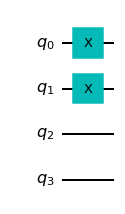

In [5]:
# 2. Electronic structure problem

# https://quantumcomputing.stackexchange.com/questions/17491/add-freezecoreorbitals-on-electronicstructureproblem
# https://qiskit.org/documentation/nature/stubs/qiskit_nature.transformers.FreezeCoreTransformer.html
if freeze == True:
    if remove_orbitals == None:
        problem = ElectronicStructureProblem(driver, q_molecule_transformers=[FreezeCoreTransformer(freeze_core=True)])
    else:
        problem = ElectronicStructureProblem(driver, q_molecule_transformers=[FreezeCoreTransformer(freeze_core=True, 
                                                                                     remove_orbitals=remove_orbitals)])
else:
    problem = ElectronicStructureProblem(driver)
    
# Generate the second-quantized operators
second_q_ops = problem.second_q_ops()
# Hamiltonian
main_op = second_q_ops[0]

# 3. QubitConverter
# https://qiskit.org/documentation/nature/stubs/qiskit_nature.converters.second_quantization.QubitConverter.html

if mapper_type == 'ParityMapper':
    mapper = ParityMapper()
elif mapper_type == 'JordanWignerMapper':
    mapper = JordanWignerMapper()
elif mapper_type == 'BravyiKitaevMapper':
    mapper = BravyiKitaevMapper()

# We use two_qubit_reduction=True to eliminate 2 qubits
converter = QubitConverter(mapper=mapper, two_qubit_reduction=True, 
                           z2symmetry_reduction=z2symmetry_reduction)

# The fermionic operators are mapped to qubit operators
num_particles = (problem.molecule_data_transformed.num_alpha,
             problem.molecule_data_transformed.num_beta)
qubit_op = converter.convert(main_op, num_particles=num_particles)

# 4. Initial state
num_particles = (problem.molecule_data_transformed.num_alpha,
             problem.molecule_data_transformed.num_beta)
num_spin_orbitals = 2 * problem.molecule_data_transformed.num_molecular_orbitals

# The initial state is the Hartree-Fock state
init_state = HartreeFock(num_spin_orbitals, num_particles, converter)
print("The initial state is the Hartree-Fock state")
init_state.draw('mpl')


Number of parameters in the ansatz:  16


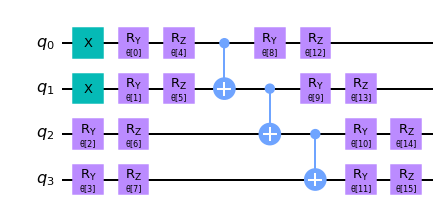

In [6]:
# 5. Ansatz

# Put arguments for twolocal
if ansatz_type == "TwoLocal":
    # Single qubit rotations that are placed on all qubits with independent parameters
    rotation_blocks = ['ry', 'rz']
    # Repetitions of rotation_blocks + entanglement_blocks with independent parameters
    ansatz = TwoLocal(qubit_op.num_qubits, rotation_blocks, entanglement_blocks, reps=repetitions, 
            entanglement=entanglement, skip_final_rotation_layer=skip_final_rotation_layer)
    # Add the initial state
    ansatz.compose(init_state, front=True, inplace=True)
elif ansatz_type == "UCCSD":
    ansatz = UCCSD(converter,num_particles,num_spin_orbitals,initial_state = init_state)
elif ansatz_type == "PUCCD":
    ansatz = PUCCD(converter,num_particles,num_spin_orbitals,initial_state = init_state)
elif ansatz_type == "SUCCD":
    ansatz = SUCCD(converter,num_particles,num_spin_orbitals,initial_state = init_state)
elif ansatz_type == "Custom":
    # Example of how to write your own circuit
    from qiskit.circuit import Parameter, QuantumCircuit, QuantumRegister
    # Define the variational parameter
    theta = Parameter('a')
    n = qubit_op.num_qubits
    # Make an empty quantum circuit
    qc = QuantumCircuit(qubit_op.num_qubits)
    qubit_label = 0
    # Place a Hadamard gate
    qc.h(qubit_label)
    # Place a CNOT ladder
    for i in range(n-1):
        qc.cx(i, i+1)
    # Visual separator
    qc.barrier()
    # rz rotations on all qubits
    qc.rz(theta, range(n))
    ansatz = qc
    ansatz.compose(init_state, front=True, inplace=True)

print("\nNumber of parameters in the ansatz: ", ansatz.num_parameters)
    
# Draw ansatz circuit
ansatz.draw('mpl')

In [7]:
# 6. Backend
backend = Aer.get_backend('statevector_simulator')

# 7. Optimizer
if optimizer_type == 'COBYLA':
    optimizer = COBYLA(maxiter=500)
elif optimizer_type == 'L_BFGS_B':
    optimizer = L_BFGS_B(maxfun=500)
elif optimizer_type == 'SPSA':
    optimizer = SPSA(maxiter=10000)
elif optimizer_type == 'SLSQP':
    optimizer = SLSQP(maxiter=1000)

In [8]:
# 8. Exact eigensolver

def exact_diagonalizer(problem, converter):
    solver = NumPyMinimumEigensolverFactory()
    calc = GroundStateEigensolver(converter, solver)
    result = calc.solve(problem)
    return result

converter2 = QubitConverter(mapper=mapper, two_qubit_reduction=True)
result_exact = exact_diagonalizer(problem, converter2)
exact_energy = np.real(result_exact.eigenenergies[0])
print("Exact electronic energy", exact_energy)
print(result_exact)

Exact electronic energy -1.0887060157347397
=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -8.907396311316
  - computed part:      -1.088706015735
  - FreezeCoreTransformer extracted energy part: -7.818690295581
~ Nuclear repulsion energy (Hartree): 1.025934879643
> Total ground state energy (Hartree): -7.881461431673
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  2.92416221]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  4.76300889]
    - computed part:      [0.0  0.0  4.76695575]
    - FreezeCoreTransformer extracted energy part: [0.0  0.0  -0.00394686]
  > Dipole moment (a.u.): [0.0  0.0  -1.83884668]  Total: 1.83884668
                 (debye): [0.0  0.0  -4.67388163]  Total: 4.67388163
 


In [9]:
# 9. VQE and initial parameters for the ansatz

# Print and save the data in lists
def callback(eval_count, parameters, mean, std):  
    # Overwrites the same line when printing
    display("Evaluation: {}, Energy: {}, Std: {}".format(eval_count, mean, std))
    clear_output(wait=True)
    counts.append(eval_count)
    values.append(mean)
    params.append(parameters)
    deviation.append(std)

counts = []
values = []
params = []
deviation = []

# Set initial parameters of the ansatz
initial_point = [0.01] * ansatz.num_parameters

algorithm = VQE(ansatz,
                optimizer=optimizer,
                quantum_instance=backend,
                callback=callback,
                initial_point=initial_point)

result = algorithm.compute_minimum_eigenvalue(qubit_op)

print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 786,
    'eigenstate': array([ 1.39090962e-03+1.62844909e-04j, -4.80506669e-03-1.47057709e-04j,
        2.62470895e-02+8.47637951e-04j, -9.91330241e-01+1.36833173e-02j,
       -5.37452353e-02-3.77359639e-03j, -3.69092074e-04-8.91094204e-05j,
        8.79444047e-04-4.46208145e-06j, -2.32783673e-02+1.49213026e-03j,
       -2.67383761e-03-7.05410663e-05j, -1.11862405e-05-8.32193802e-06j,
        3.67295273e-06+2.34864496e-05j,  3.09841444e-04-9.10745504e-04j,
        1.13572120e-01-2.69510373e-03j,  5.55003757e-04+1.40965072e-04j,
       -5.49600620e-04+3.83366198e-05j, -2.79525589e-05-1.95269055e-05j]),
    'eigenvalue': -1.0863472021050156,
    'optimal_parameters': {   ParameterVectorElement(θ[15]): -0.09609118293747707,
                              ParameterVectorElement(θ[8]): 0.052287836426541286,
                              ParameterVectorElement(θ[4]): -0.04518757712732547,
                              ParameterV

In [10]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

# Unroller transpile your circuit into CNOTs and U gates
pass_ = Unroller(['u', 'cx'])
pm = PassManager(pass_)
ansatz_tp = pm.run(ansatz)
cnots = ansatz_tp.count_ops()['cx']
score = cnots

accuracy_threshold = 4.0 # in mHa
energy = result.optimal_value

print("Alain Chancé has selected the following options and parameters:\n")

print("The initial state is the Hartree-Fock state")
print("initial_point = [0.01] * ansatz.num_parameters")
print("Accuracy_threshold = 4.0 in mHa")

print("Mapper: {}, Freeze core: {}, Z2Symmetries: {}, removing orbitals: {}, Optimizer: {}".
          format(mapper_type, freeze, z2symmetry_reduction, remove_orbitals, optimizer_type))
print("two_qubit_reduction: ", True)
print("Ansatz: {}".format(ansatz_type))

if ansatz_type == "TwoLocal":
    print("Rotations blocks: {}, entanglement blocks: {}, entanglement: {}".format(rotation_blocks,
                                                                entanglement_blocks, entanglement))
    print("Skip the final rotation blocks layer: {}, repetitions: {},".format(skip_final_rotation_layer, repetitions))

print("\nNumber of parameters in the ansatz: ", ansatz.num_parameters)
print("\nChemical accuracy (mHa) {:.6f}".format((energy-exact_energy)*1000))
print("Pass: {}".format((energy-exact_energy)*1000 <= accuracy_threshold))
print("Score: {}".format(score))

Alain Chancé has selected the following options and parameters:

The initial state is the Hartree-Fock state
initial_point = [0.01] * ansatz.num_parameters
Accuracy_threshold = 4.0 in mHa
Mapper: ParityMapper, Freeze core: True, Z2Symmetries: [1, 1], removing orbitals: [4, 3], Optimizer: SLSQP
two_qubit_reduction:  True
Ansatz: TwoLocal
Rotations blocks: ['ry', 'rz'], entanglement blocks: cx, entanglement: linear
Skip the final rotation blocks layer: False, repetitions: 1,

Number of parameters in the ansatz:  16

Chemical accuracy (mHa) 2.358814
Pass: True
Score: 3
